Using your store items data you acquired in lesson 1 exercises:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import acquire

1. Convert date column to datetime format.

In [2]:
df = acquire.get_all_data(use_cache=True)
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [4]:
df['sale_date'].head()

0   2013-01-01 00:00:00+00:00
1   2013-01-02 00:00:00+00:00
2   2013-01-03 00:00:00+00:00
3   2013-01-04 00:00:00+00:00
4   2013-01-05 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
item_id          913000 non-null int64
sale_amount      913000 non-null float64
sale_date        913000 non-null datetime64[ns, UTC]
sale_id          913000 non-null int64
store_id         913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(6), object(5)
memory usage: 104.5+ MB


2. Plot the distribution of sale_amount, item_price and sale_date.

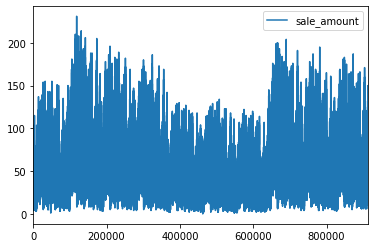

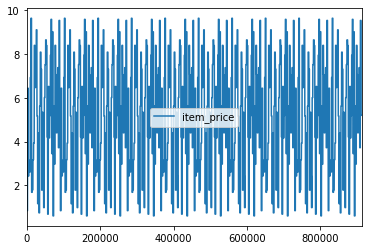

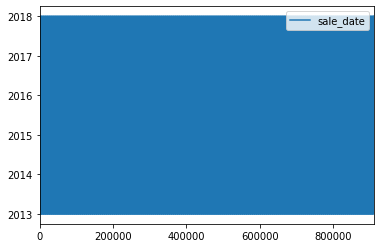

In [6]:
df[['sale_amount']].plot()
df[['item_price']].plot()
df[['sale_date']].plot()

3. Set the index to be the datetime variable.

In [7]:
df = df.sort_values(by='sale_date').set_index('sale_date')

In [8]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [9]:
df['month'] = df.index.strftime('%m-%b')
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan


In [10]:
df['day_of_week'] = df.index.strftime('%w-%A')
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tuesday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [11]:
df['total_sales'] = df['sale_amount'] * df['item_price']
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,total_sales
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tuesday,10.92


6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [12]:
# keep total_sales in a dataframe
sales_sum = df.resample("D")[['total_sales']].sum()
sales_sum.head(3)

,total_sales
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48


In [18]:
sales_sum['sales_differences'] = sales_sum['total_sales'].diff()
sales_sum.head(10)

,total_sales,sales_differences
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12
2013-01-06 00:00:00+00:00,93093.85,5472.00
2013-01-07 00:00:00+00:00,63777.54,-29316.31
2013-01-08 00:00:00+00:00,72994.66,9217.12
2013-01-09 00:00:00+00:00,75133.92,2139.26


7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# # Function to prepare sale data
# def prepare_sale():
#     df = acquire.get_all_data(use_cache=True)
#     df['sale_date'] = pd.to_datetime(df['sale_date'])
#     df = df.sort_values(by='sale_date').set_index('sale_date')
#     df['month'] = df.index.strftime('%m-%b')
#     df['day_of_week'] = df.index.strftime('%w-%A')
#     df['total_sales'] = df['sale_amount'] * df['item_price']
#     sales_sum = df.resample("D")[['total_sales']].sum()
#     sales_sum['sales_differences'] = sales_sum['total_sales'].diff()
#     return df

In [ ]:
# Sale distribution function
# def sale_distributions():
#     df[['sale_amount']].plot()
#     df[['item_price']].plot()
#     df[['sale_date']].plot()

Using the OPS data acquired in lesson 1 exercises:

In [3]:
ops = acquire.get_opsd_data(use_cache=True)

In [4]:
ops.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


1. Convert date column to datetime format.

In [6]:
ops['Date'] = pd.to_datetime(ops['Date'])

In [7]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null datetime64[ns]
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


2. Plot the distribution of each of your variables.

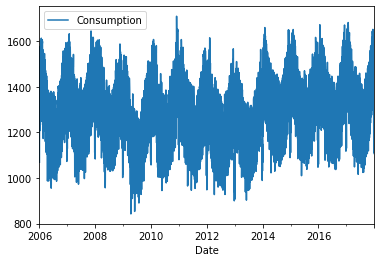

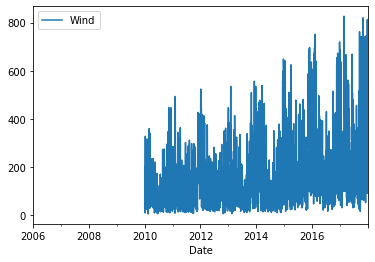

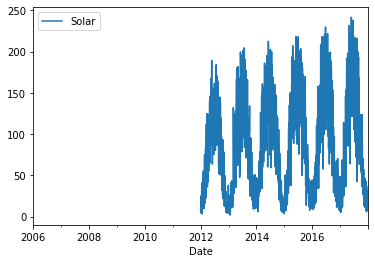

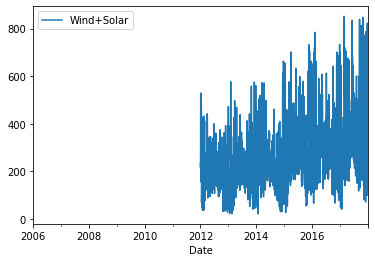

In [24]:
ops[['Consumption']].plot()
ops[['Wind']].plot()
ops[['Solar']].plot()
ops[['Wind+Solar']].plot()

3. Set the index to be the datetime variable.

In [9]:
ops = ops.set_index('Date')

In [12]:
ops.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


4. Add a month and a year column to your dataframe.

In [17]:
ops['month'] = ops.index.month

In [19]:
ops['year'] = ops.index.year

In [20]:
ops.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006


In [23]:
ops.tail(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017
2017-12-30,1215.44897,721.247,7.467,728.714,12,2017
2017-12-31,1107.11488,721.176,19.980,741.156,12,2017


5. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# Function without distributions
# def prepare_ops():
#     ops = acquire.get_opsd_data(use_cache=True)
#     ops['Date'] = pd.to_datetime(ops['Date'])
#     ops = ops.set_index('Date')
#     ops['month'] = ops.index.month
#     ops['year'] = ops.index.year
#     return ops

In [ ]:
# Ops distributions
# def ops_distributions():
#     ops = acquire.get_opsd_data(use_cache=True)
#     ops['Date'] = pd.to_datetime(ops['Date'])
#     ops[['Date']].plot()
#     ops[['Consumption']].plot()
#     ops[['Wind']].plot()
#     ops[['Solar']].plot()
#     ops[['Wind+Solar']].plot()